In [84]:
# DATA LOADING 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [87]:
## DATA CLEANING

In [88]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [89]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [90]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(merged_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [91]:
### EDA

<Axes: xlabel='Region'>

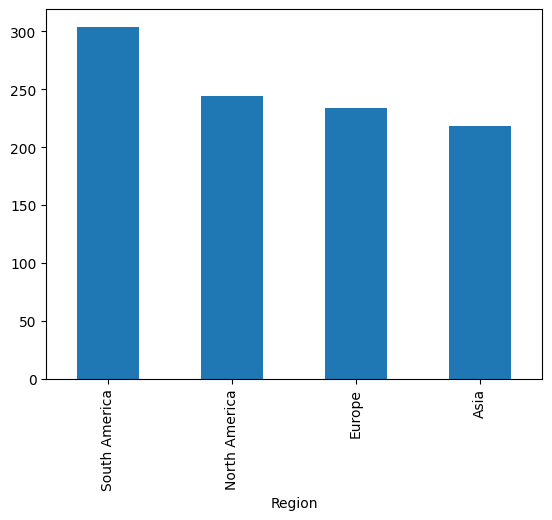

In [92]:
# Distribution of Regions
merged_data['Region'].value_counts().plot(kind='bar')



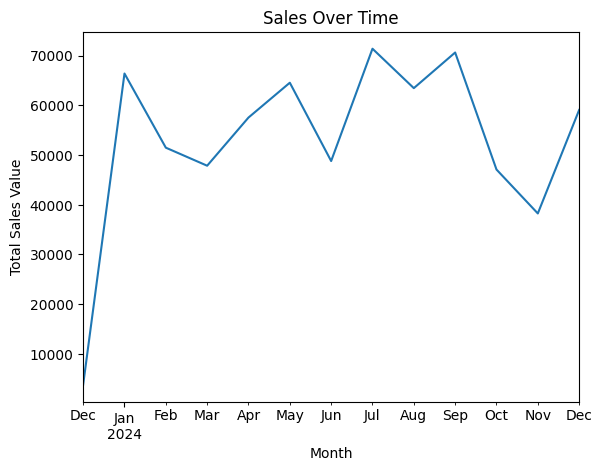

In [93]:

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
sales_over_time = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.show()


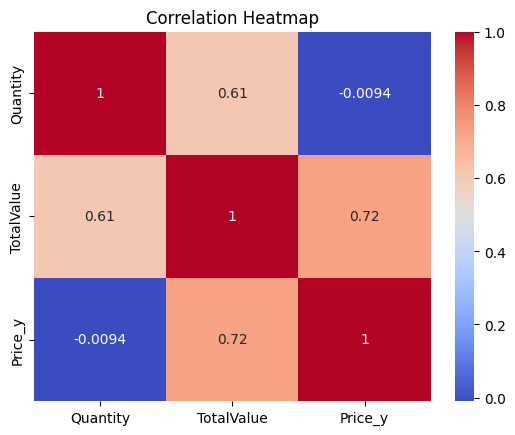

In [94]:
numerical_data = merged_data[['Quantity', 'TotalValue', 'Price_y']]
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


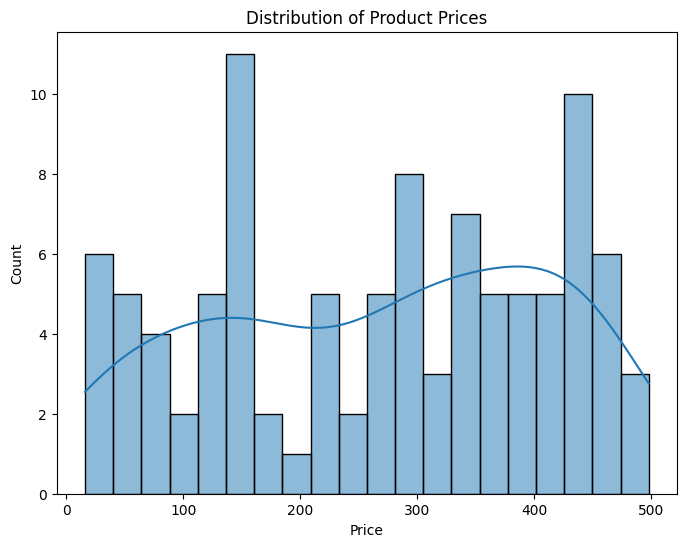

In [95]:
# Plot distribution of product prices
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.show()


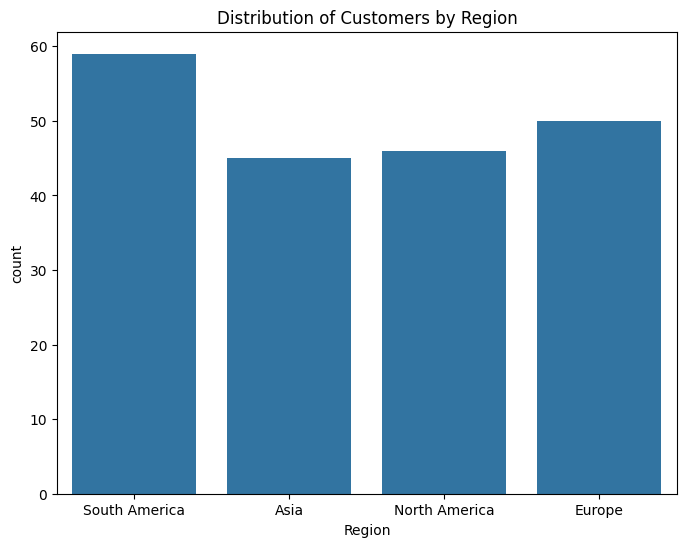

In [96]:
# customer distribution by region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region')
plt.title('Distribution of Customers by Region')
plt.show()

In [97]:
regional_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(regional_sales)


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [98]:
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_sales)


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [99]:
product_sales = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print(product_sales.head(5))


ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [100]:
# CUSTOMER RETENTION 

In [101]:
# counting purchase per customer
customer_purchases = transactions.groupby('CustomerID').size()
print(customer_purchases)


CustomerID
C0001    5
C0002    4
C0003    4
C0004    8
C0005    3
        ..
C0196    4
C0197    3
C0198    2
C0199    4
C0200    5
Length: 199, dtype: int64


In [102]:
# identifying repeat customers

repeat_customers = customer_purchases[customer_purchases > 1]
print(len(repeat_customers))  # Count of repeat customers


187


In [103]:
total_customers = len(customer_purchases)
retention_rate = len(repeat_customers) / total_customers * 100
print(f'Retention Rate: {retention_rate:.2f}%')


Retention Rate: 93.97%


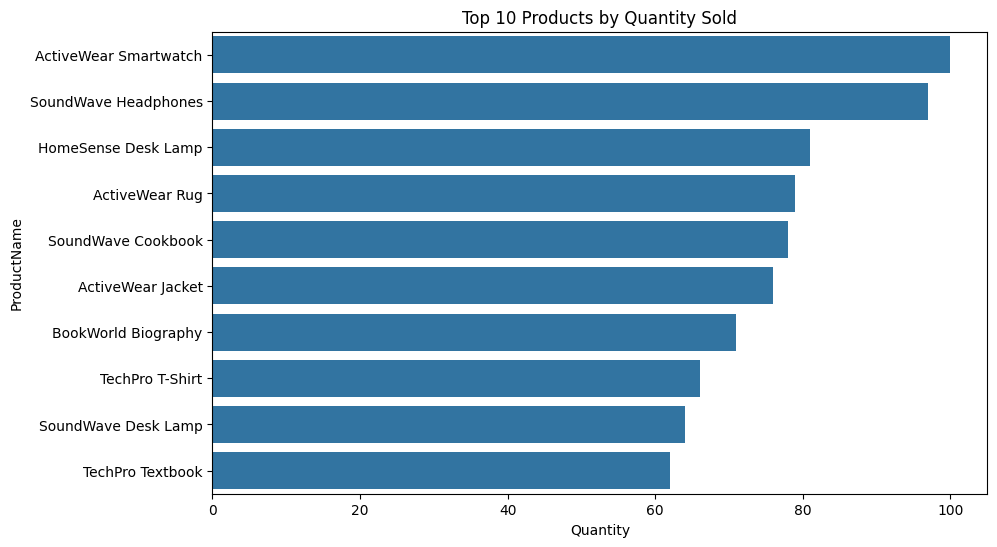

In [104]:

product_sales = merged_data.groupby('ProductName')['Quantity'].sum().reset_index()
product_sales = product_sales.sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales.head(10), x='Quantity', y='ProductName')
plt.title('Top 10 Products by Quantity Sold')
plt.show()


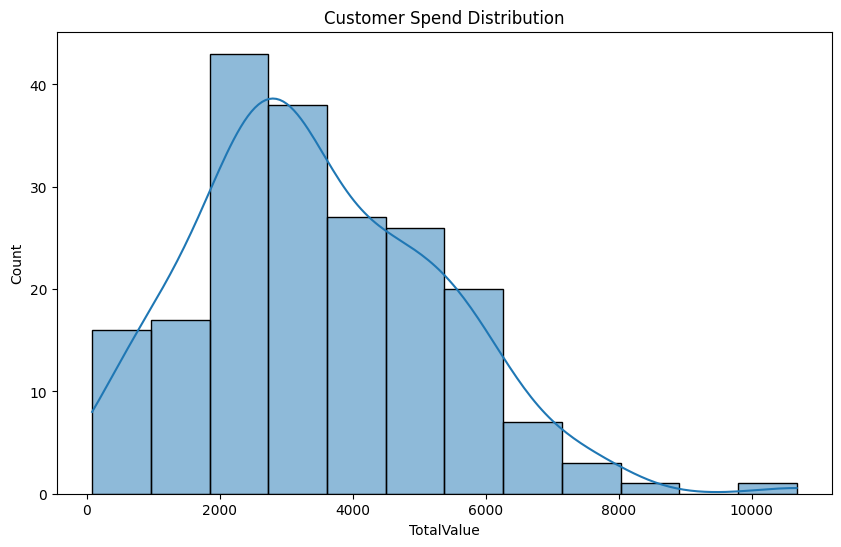

In [105]:

customer_spend = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()




plt.figure(figsize=(10, 6))
sns.histplot(customer_spend['TotalValue'], kde=True)
plt.title('Customer Spend Distribution')
plt.show()
